In [50]:
# Clear everything.
%reset -f

import random
import pandas
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from sklearn import linear_model, datasets, preprocessing
import plotly.plotly as py
import plotly.graph_objs as go

# Configure matplotlib.
%matplotlib inline

# Login to plotly.
py.sign_in('severo', '32lck03rn2')

In [51]:
# CONSTANTS
N = 10000

In [52]:
# Import training data.
data = pandas.read_csv('data/train.csv')

# Create city map.
city_map = Basemap(projection = 'lcc', resolution='h', 
                   lat_0 = 37.760, lon_0 = -122.44,
                   width = 15000, height = 15000);

In [53]:
# Convert lon. and lat. to cartasian coordinates.
x, y = city_map(data[:N]['X'].values, data[:N]['Y'].values)

In [54]:
# Create features and target vectors.
X = numpy.column_stack((x,y))
Y_labels = data[:N]['PdDistrict'].values
le = preprocessing.LabelEncoder()
le.fit(Y_labels);
Y = le.transform(Y_labels)

In [55]:
# Train model.
model = linear_model.LogisticRegression()

# we create an instance of Neighbours Classifier and fit the data.
model.fit(X, Y)

# Check model score.
model.score(X,Y)

0.32479999999999998

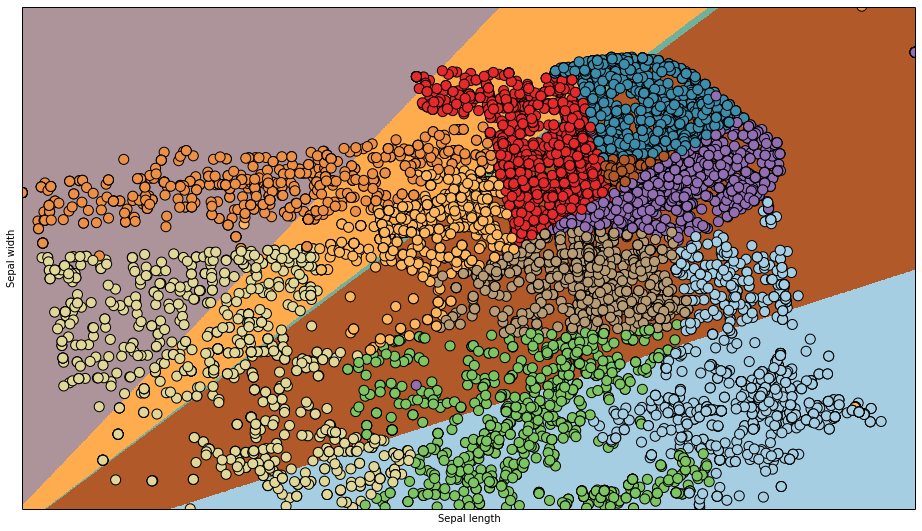

In [56]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
h = 10
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h), numpy.arange(y_min, y_max, h))
Z = model.predict(numpy.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(16, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired, s = 100)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()